### 목표 : 생선 분류 모델
- 데이터 : fish.csv
- 피쳐 : 5개 [Weight, Length, Diagonal, Height, Width]
- 타겟 : 1개 [Species]
- 방법 : 지도학습 + 다중분류 (Species가 2개 보다 많아서)

(1) 모듈 로딩 및 데이터 준비

In [54]:
# 모듈 로딩
import pandas as pd
import numpy as np

In [55]:
# 데이터 준비
data_file = '../Data/fish.csv'

fishDF = pd.read_csv(data_file)
fishDF.head(2)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


(2) 학습을 위한 데이터 준비 <hr>

(2-1) 피쳐, 타겟 분리

In [56]:
featureDF = fishDF[fishDF.columns[1:]]
targetSR = fishDF[fishDF.columns[0]]

featureDF.shape, targetSR.shape

((159, 5), (159,))

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(targetSR)

LabelEncoder()

In [58]:
targetArr = encoder.transform(targetSR)
print(targetArr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


In [59]:
encoder.inverse_transform(targetArr)

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [60]:
# 타겟의 클래스 수 확인
targetSR.nunique()

7

In [61]:
# 타겟 클래스 별 데이터 수 확인
targetSR.value_counts() / targetSR.shape[0] * 100

Species
Perch        35.220126
Bream        22.012579
Roach        12.578616
Pike         10.691824
Smelt         8.805031
Parkki        6.918239
Whitefish     3.773585
Name: count, dtype: float64

(2-2) 학습용, 테스트용 데이터셋 준비

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, pd.Series(targetArr), stratify=targetSR, test_size=.3, random_state=11)

In [64]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((111, 5), (111,), (48, 5), (48,))

(3) 학습 진행

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
# 모델 인스턴스 생성 및 학습
# - max_iter : 처음부터 끝까지 몇 번 공부할 것인가
# - solver   : 공부 방법
model = LogisticRegression(max_iter=20000, solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(max_iter=20000, solver='liblinear')

In [67]:
# 모델 파라미터 확인
print(f'classes_ : {model.classes_}')
print(f'feature_names_in_ : {model.feature_names_in_}')
print(f'max_iter : {model.max_iter}')
print(f'coef_ : {model.coef_}\n')

classes_ : [0 1 2 3 4 5 6]
feature_names_in_ : ['Weight' 'Length' 'Diagonal' 'Height' 'Width']
max_iter : 20000
coef_ : [[ 1.28185221e-02 -1.63664985e+00  8.26097001e-01  1.38446102e+00
  -3.70035510e-01]
 [-2.08527197e-02  3.47311157e-01 -9.73420450e-01  2.17759317e+00
   3.60579992e-02]
 [-1.59210283e-03  2.36983999e+00 -2.47819753e+00 -5.33154928e-02
   2.23541731e+00]
 [ 9.95091272e-03  2.48444967e-01  1.51723050e-01 -1.92391373e+00
  -8.14114467e-01]
 [-1.26604339e-02 -1.70417943e+00  1.51385840e+00 -4.21818330e-01
   1.61978657e+00]
 [-7.12456486e-02  3.90485479e-01  1.61167323e-01 -1.58233266e+00
  -6.04769548e-01]
 [ 5.90142729e-03 -3.49987673e-01  1.24951040e-01 -1.70126127e-01
   4.52752439e-01]]


(4) 평가

In [68]:
print(f'[Train Score] {model.score(x_train, y_train)}\n[Test Score] {model.score(x_test, y_test)}')

[Train Score] 0.963963963963964
[Test Score] 0.9375


(5) 모델 활용 <hr>

In [69]:
y_pred = model.predict(x_test.iloc[[0]])
y_pred, y_test.iloc[0]

(array([0]), 0)

In [70]:
model.predict_proba(x_test.iloc[[0]])   # 각 타겟 클래스 별 답일 가능성

array([[9.69808851e-01, 1.94077016e-03, 6.24174785e-04, 2.39912738e-07,
        1.78571301e-03, 4.53756032e-26, 2.58402507e-02]])

In [71]:
# 5개 데이터에 대한 생선 분류 예측
print(model.classes_)   # 각 클래스의 이름 출력
np.round(model.predict_proba(x_test.iloc[:5]), 3), y_test[:5].to_list()

[0 1 2 3 4 5 6]


(array([[0.97 , 0.002, 0.001, 0.   , 0.002, 0.   , 0.026],
        [0.156, 0.719, 0.041, 0.   , 0.072, 0.   , 0.012],
        [0.966, 0.012, 0.001, 0.   , 0.003, 0.   , 0.018],
        [0.   , 0.018, 0.778, 0.005, 0.174, 0.001, 0.025],
        [0.   , 0.   , 0.061, 0.93 , 0.   , 0.   , 0.009]]),
 [0, 1, 0, 2, 3])

In [72]:
result = model.predict_proba(x_test.iloc[:5]).argmax(axis=1)
data = {'Pred Y': [model.classes_[idx] for idx in result],
        'True Y': y_test[:5].to_list()}
data

{'Pred Y': [0, 1, 0, 2, 3], 'True Y': [0, 1, 0, 2, 3]}

(6) 모델 성능 평가 <hr>
- 정확도
- 정밀도
- 재현율
- F1-Score
- Confusion Matrics
- Classification Report

In [73]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
print(classification_report(y_test, model.predict(x_test), zero_division=0))    # (정답, 예측값)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         3
           2       0.85      1.00      0.92        17
           3       1.00      1.00      1.00         5
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.84      0.83      0.83        48
weighted avg       0.91      0.94      0.92        48


In [75]:
f1_score(y_test, model.predict(x_test), average='weighted')                     # (정답, 예측값, 옵션)

0.9182534807534807

In [76]:
recall_score(y_test, model.predict(x_test), average='micro')                 # (정답, 예측값, 옵션)

0.9375

In [77]:
confusion_matrix(y_test, model.predict(x_test))

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  1,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  2,  0,  0,  0,  0]], dtype=int64)

In [80]:
model.classes_, encoder.inverse_transform(model.classes_)

(array([0, 1, 2, 3, 4, 5, 6]),
 array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object))

In [79]:
print('타겟 라벨 ', model.classes_)
labels = encoder.inverse_transform(model.classes_)
print('타겟 문자열 라벨 ', labels)

타겟 라벨  [0 1 2 3 4 5 6]
타겟 문자열 라벨  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


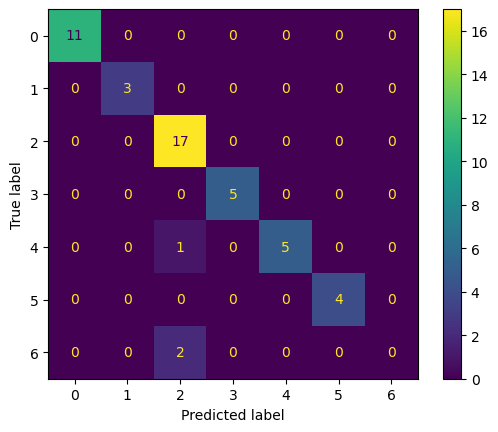

In [82]:
# confusion matrix 시각화
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ret_matrix = confusion_matrix(y_test, model.predict(x_test))
conplot = ConfusionMatrixDisplay(ret_matrix)    # sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
conplot.plot()
plt.show()